In [1]:
import os

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
os.chdir('..')

In [5]:
path = os.path.join(os.getcwd(),'Datasets\\titanic.csv')
path

'D:\\Babin\\Internship\\Fusemachine-Internship\\Data Science\\Datasets\\titanic.csv'

# Handling Outliers

#### Machine Learning Models That Are Sensitive to Outliers?
1. Naive Bayes Classifier -------------------------------- Not Sensitive To Outliers
2. SVM --------------------------------------------------- Not Sensitive To Outliers
3. Linear Regression -------------------------------------- Sensitive To Outliers
4. Logistic Regression ------------------------------------ Sensitive To Outliers
5. Decision Tree Regressor or Classifier ------------------ Not Sensitive To Outliers
6. Ensemble (Random Forest, XGBoost, GradientBoosting) ---- Not Sensitive To Outliers
7. K-Nearest Neighbor ------------------------------------- Not Sensitive To Outliers
8. K-Means Clustering ------------------------------------- Sensitive To Outliers
9. Hierarchial Clustering --------------------------------- Sensitive To Outliers
10. Principal Component Analysis -------------------------- Sensitive To Outliers
11. Neural Networks --------------------------------------- Sensitive To Outliers

In [15]:
df = pd.read_csv(path)
df.head(n=3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Checking Null Values

In [24]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [29]:
df.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

C:\Users\Predator\Envs\kn_ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

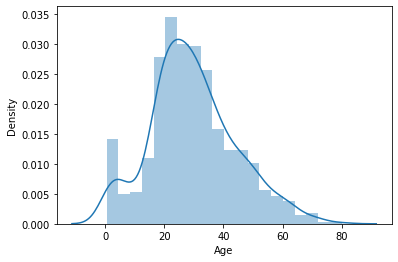

In [30]:
sns.distplot(df['Age'])

C:\Users\Predator\Envs\kn_ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

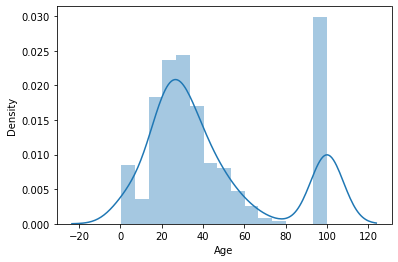

In [31]:
sns.distplot(df['Age'].fillna(100))

#### Gaussian Distributed

Text(0, 0.5, 'No. of Passengers')

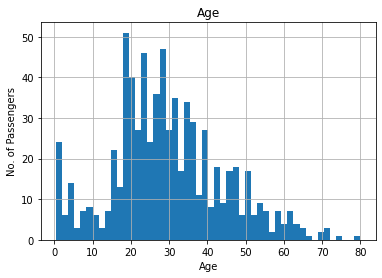

In [38]:
figure = df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No. of Passengers')

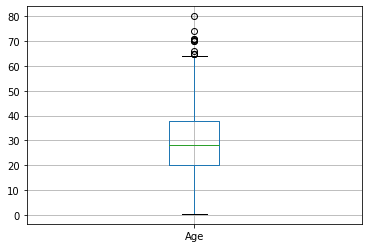

In [45]:
figure = df.boxplot(column='Age')

In [46]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

# If the data is normally distributed we use this

#### Assuming Age follows a Gaussian Distribution we will calculate the boundareis which differentiates the outliers

In [58]:
upper_boundary = df['Age'].mean() + 3 * df['Age'].std()
upper_boundary

73.27860964406094

In [59]:
lower_boundary = df['Age'].mean() - 3 * df['Age'].std()
lower_boundary

-13.880374349943303

In [61]:
df['Age'].mean()

29.69911764705882

#### Computing the Interquartile range to calculate the boundaries

In [66]:
IQR = df.Age.quantile(0.75) - df.Age.quantile(0.25)
IQR

17.875

In [69]:
lower_bridge=df['Age'].quantile(0.25) - (IQR*1.5)
upper_bridge=df['Age'].quantile(0.75) + (IQR*1.5)
print(f'Lower Bridge: {lower_bridge}')
print(f'Upper Bridge: {upper_bridge}')

Lower Bridge: -6.6875
Upper Bridge: 64.8125


# If the distribution is skewed

#### What if the feature is skewed

Text(0, 0.5, 'No. of Passengers')

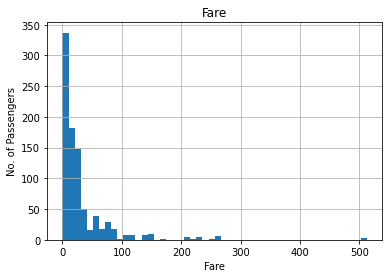

In [72]:
figure = df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No. of Passengers')

<AxesSubplot:>

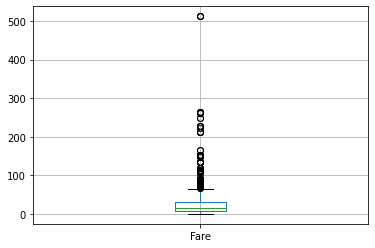

In [73]:
df.boxplot(column='Fare')

In [74]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [93]:
upper_boundary = df['Fare'].mean() + 3 * df['Fare'].std()
lower_boundary = df['Fare'].mean() - 3 * df['Fare'].std()
print(upper_boundary)
print(lower_boundary)

181.2844937601173
-116.87607782296804


In [78]:
IQR = df.Fare.quantile(0.75) - df.Fare.quantile(0.25)
IQR

23.0896

In [79]:
lower_bridge=df['Fare'].quantile(0.25) - (IQR*1.5)
upper_bridge=df['Fare'].quantile(0.75) + (IQR*1.5)
print(f'Lower Bridge: {lower_bridge}')
print(f'Upper Bridge: {upper_bridge}')

Lower Bridge: -26.724
Upper Bridge: 65.6344


In [80]:
lower_bridge=df['Fare'].quantile(0.25) - (IQR*3)
upper_bridge=df['Fare'].quantile(0.75) + (IQR*3)
print(f'Lower Bridge: {lower_bridge}')
print(f'Upper Bridge: {upper_bridge}')

Lower Bridge: -61.358399999999996
Upper Bridge: 100.2688


In [90]:
data = df.copy()
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [91]:
data.loc[data['Age']>73,'Age']

630    80.0
851    74.0
Name: Age, dtype: float64

In [94]:
data.loc[data['Fare']>100,'Fare'] = 100

<AxesSubplot:xlabel='Fare', ylabel='Count'>

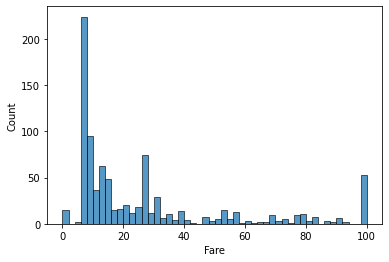

In [97]:
sns.histplot(data['Fare'],bins=50)

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X_train,X_test,y_train,y_test = train_test_split(data[['Age','Fare']].fillna(0), data['Survived'],test_size=0.3)

### Logistic Regression

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

classifier = LogisticRegression()
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)
y_pred_prob = classifier.predict_proba(X_test)

print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Roc Auc Score: {roc_auc_score(y_test,y_pred_prob[:,1])}')

Accuracy Score: 0.6828358208955224
Roc Auc Score: 0.7025680112570357


### RandomForestClassifier

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)
y_pred_prob = classifier.predict_proba(X_test)

print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Roc Auc Score: {roc_auc_score(y_test,y_pred_prob[:,1])}')

Accuracy Score: 0.6828358208955224
Roc Auc Score: 0.7315021106941838
